In [22]:
from dicke_h import *
from qutip import *
from matplotlib import pyplot as plt

In [25]:
# define system size and algebra
ntls = 2
N = ntls
[jx, jy, jz, jp, jm] = j_algebra(N)

In [26]:
# define spin dynamics
gCE = 1
gP = 0.0
gD = 0.0
w0 = 1
wi = 0.1
h = w0 * jz + wi * jx
dicke = Dicke(hamiltonian = h, N = N, emission = gCE, pumping = gP, dephasing = gD)
psolv = Pisolve(dicke)

In [27]:
#build spin liouvillian
#lind = psolv.lindblad_sup()
liouv = psolv.liouvillian()

In [28]:
#set initial conditions for spins
t = np.linspace(0, 1, 100)
rho0 = dicke.dicke(N/2, N/2)

In [29]:
#solve using qutip
result = mesolve(h, rho0, t, [liouv], e_ops = [jz, jp*jm])
rhot = result.states
jz_t = result.expect[0]
jpjm_t = result.expect[1]

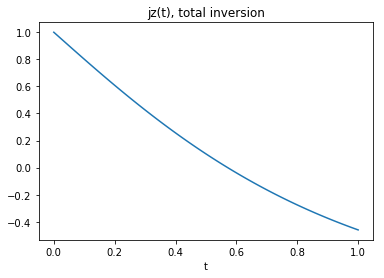

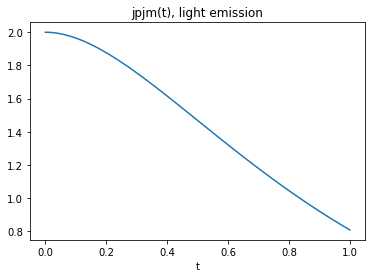

In [30]:
fig1 = plt.figure()
plt.plot(t, jz_t)
#plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t, jpjm_t)
#plt.ylim([-1,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()

In [87]:
#build photonic liouvillian
nphot = 2
wc = 0.1
kappa = 0.1
a = destroy(nphot)
h_phot = wc * a.dag() * a
c_ops_phot = [np.sqrt(kappa) * a]
liouv_phot = liouvillian(h_phot, c_ops_phot)
nds = num_dicke_states(ntls)

In [107]:
liouv_tot = super_tensor(liouv_phot, to_super(qeye(nds))) + super_tensor(to_super(qeye(nphot)), liouv)
liouv_tot

Quantum object: dims = [[[2, 4], [2, 4]], [[2, 4], [2, 4]]], shape = (64, 64), type = super, isherm = False
Qobj data =
[[-2.0+0.j          0.0-0.07071068j  0.0+0.j         ...,  0.0+0.j          0.0+0.j
   0.0+0.j        ]
 [ 0.0-0.07071068j -2.0+1.j          0.0-0.07071068j ...,  0.0+0.j          0.0+0.j
   0.0+0.j        ]
 [ 0.0+0.j          0.0-0.07071068j -1.0+2.j         ...,  0.0+0.j          0.0+0.j
   0.0+0.j        ]
 ..., 
 [ 0.0+0.j          0.0+0.j          0.0+0.j         ..., -0.1+0.j
   0.0-0.07071068j  0.0+0.j        ]
 [ 0.0+0.j          0.0+0.j          0.0+0.j         ...,  0.0-0.07071068j
  -0.1+1.j          0.0+0.j        ]
 [ 0.0+0.j          0.0+0.j          0.0+0.j         ...,  0.0+0.j          0.0+0.j
  -0.1+0.j        ]]

In [108]:
#strong coupling light-matter interaction
h_int = tensor(a + a.dag(), jx) 

In [109]:
h_int

Quantum object: dims = [[2, 4], [2, 4]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.70710678
   0.          0.        ]
 [ 0.          0.          0.          0.          0.70710678  0.
   0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.          0.70710678
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.70710678  0.          0.          0.          0.          0.
   0.        ]
 [ 0.70710678  0.          0.70710678  0.          0.          0.          0.
   0.        ]
 [ 0.          0.70710678  0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]]

In [110]:
liouv_h_int =  - 1j* spre(h_int) + 1j* spost(h_int)
liouv_h_int
liouv_tot_int = liouv_tot + liouv_h_int

In [117]:
#solve using qutip
options = Options()#nsteps = 10000, atol = 1e-6)
jz_tot = tensor(qeye(nphot), jz)
jpjm_tot = tensor(qeye(nphot), jp*jm)
adag_a_tot = tensor(a*a.dag(), qeye(nds))
jpjm_tot = tensor(qeye(nphot), jp*jm)
rho0_phot = ket2dm(basis(nphot))
rho0_tot = tensor(rho0_phot, rho0)

result = mesolve(liouv_tot_int, rho0_tot, t, [], e_ops = [jz_tot, jpjm_tot, adag_a_tot], options=options)
rhot_tot = result.states
jzt_tot = result.expect[0]
jpjmt_tot = result.expect[1]
adagat_tot = result.expect[2]

In [ ]:
fig1 = plt.figure()
plt.plot(t, jzt_tot)
#plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t, jpjmt_tot)
#plt.ylim([-1,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()